In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [123]:
df=pd.read_csv('breast-cancer.csv')

In [124]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [125]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [126]:
#encode the categorical data
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df['diagnosis'].unique()
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [127]:
y=df['diagnosis']
print(f'Unique values in y: {np.unique(y)}')
print(f'Number of 0 in y: {np.sum(y==0)}')
print(f'Number of 1 in y: {np.sum(y==1)}')


Unique values in y: [0 1]
Number of 0 in y: 357
Number of 1 in y: 212


In [128]:
#drop id, diagnosis and unnamed columns
X=df.drop(['diagnosis','id'],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [129]:
#compute the anomally rate in the dataset
anomaly_rate=np.sum(y)/len(y)
print(f'Anomaly rate: {anomaly_rate}')

Anomaly rate: 0.37258347978910367


In [130]:
#scale the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#store X in a dataframe
X=pd.DataFrame(data=X,columns=df.columns[2:])
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


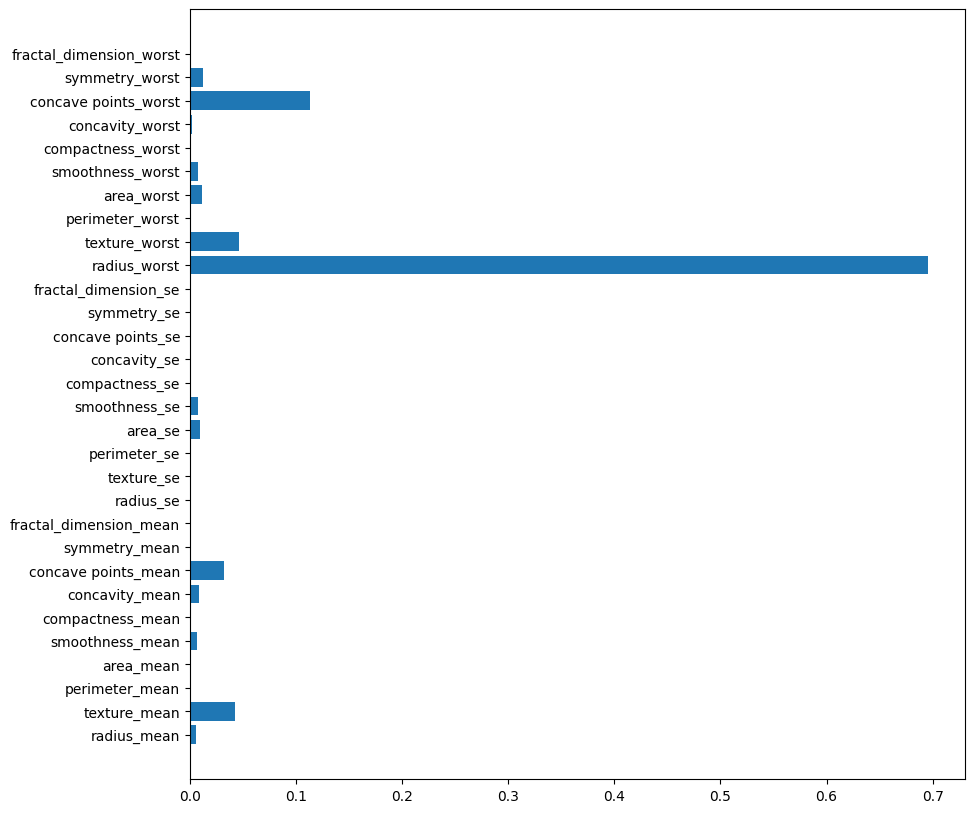

In [131]:
#eliminate features using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf=DecisionTreeClassifier()
clf=clf.fit(X,y)

#plot the feature importance
plt.figure(figsize=(10,10))
plt.barh(X.columns,clf.feature_importances_)
plt.show()


In [132]:
#store the important featues in a dataframe
feature_imp=pd.DataFrame({'feature':X.columns,'importance':clf.feature_importances_})
feature_imp.sort_values(by='importance',ascending=False)

#eliminate features with importance less than 0.1
X=X.drop(['symmetry_mean','smoothness_mean','fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se','symmetry_worst','smoothness_worst','fractal_dimension_worst'],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1.097064,-2.073335,1.269934,0.984375,3.283515,2.652874,2.532475,2.489734,2.833031,2.487578,1.316862,0.724026,0.660820,1.886690,-1.359293,2.303601,2.001237,2.616665,2.109526,2.296076
1,1.829821,-0.353632,1.685955,1.908708,-0.487072,-0.023846,0.548144,0.499255,0.263327,0.742402,-0.692926,-0.440780,0.260162,1.805927,-0.369203,1.535126,1.890489,-0.430444,-0.146749,1.087084
2,1.579888,0.456187,1.566503,1.558884,1.052926,1.363478,2.037231,1.228676,0.850928,1.181336,0.814974,0.213076,1.424827,1.511870,-0.023974,1.347475,1.456285,1.082932,0.854974,1.955000
3,-0.768909,0.253732,-0.592687,-0.764464,3.402909,1.915897,1.451707,0.326373,0.286593,-0.288378,2.744280,0.819518,1.115007,-0.281464,0.133984,-0.249939,-0.550021,3.893397,1.989588,2.175786
4,1.750297,-1.151816,1.776573,1.826229,0.539340,1.371011,1.428493,1.270543,1.273189,1.190357,-0.048520,0.828471,1.144205,1.298575,-1.466770,1.338539,1.220724,-0.313395,0.613179,0.729259


In [133]:
X.shape

(569, 20)

In [173]:
#split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [184]:
#train isolation forest model
clf=IsolationForest(n_estimators=100, max_samples=0.75, bootstrap=False, n_jobs=-1, random_state=11, verbose=0)
clf.fit(X_train)

IsolationForest(max_samples=0.75, n_jobs=-1, random_state=11)

In [185]:
anomaly_pred=clf.predict(X_test)

In [186]:
#print the unique values of the predictions
print(np.unique(anomaly_pred))

[-1  1]


In [187]:
#map the prediction -1 to 1 and 1 to 0
anomaly_pred= np.where(anomaly_pred==-1,1,0)

#print the updated predictions
print(np.unique(anomaly_pred))

[0 1]


In [188]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy:", accuracy_score(y_test, anomaly_pred))
print("Precision:", precision_score(y_test, anomaly_pred))
print("Recall:",recall_score(y_test, anomaly_pred))
print("F1 Score:",f1_score(y_test, anomaly_pred))

print("********************************\n")
#print classification report
print(classification_report(y_test, anomaly_pred))

accuracy: 0.7017543859649122
Precision: 0.8
Recall: 0.27906976744186046
F1 Score: 0.4137931034482758
********************************

              precision    recall  f1-score   support

           0       0.69      0.96      0.80        71
           1       0.80      0.28      0.41        43

    accuracy                           0.70       114
   macro avg       0.74      0.62      0.61       114
weighted avg       0.73      0.70      0.65       114



In [189]:
#feature elimination using PCA
from sklearn.decomposition import PCA

pca=PCA(0.95)
pca.fit(X)

#transform the data
X_pca=pca.transform(X)

#store the transformed data in a dataframe

X_pca=pd.DataFrame(data=X_pca)
X_pca.head()

,0,1,2,3,4,5
0,7.964096,0.995528,3.174255,-1.642530,-2.895157,0.290990
1,3.062854,-3.043751,0.671430,-1.199739,1.301656,-0.099372
2,5.567615,-0.264715,0.436245,-0.609444,0.222225,-0.869840
3,3.469126,5.572845,-0.649368,-1.161011,-2.581450,-0.912368
4,4.360096,-1.202148,2.711326,-0.739222,0.970254,0.069559


In [190]:
X_pca.shape

(569, 6)

In [191]:
# assume that X_pca is the DataFrame of features and y is the Series of class labels

# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# train isolation forest model
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=100, max_samples=0.75, bootstrap=False, n_jobs=-1, random_state=11, verbose=0)
clf.fit(X_train)

pca_pred = clf.predict(X_test)

# print the unique values of the predictions
print(np.unique(pca_pred))


[-1  1]


In [192]:
#map the prediction -1 to 1 and 1 to 0
pca_pred= np.where(pca_pred==-1,1,0)

#print the updated predictions
print(np.unique(pca_pred))

[0 1]


In [193]:
np.unique(y_test)

array([0, 1])

In [194]:
#print classification report
print(classification_report(y_test, pca_pred))

              precision    recall  f1-score   support

           0       0.64      0.96      0.76        71
           1       0.57      0.09      0.16        43

    accuracy                           0.63       114
   macro avg       0.60      0.53      0.46       114
weighted avg       0.61      0.63      0.54       114



In [46]:
#train the model using xgboost
from xgboost import XGBClassifier

clf=XGBClassifier()

clf.fit(X_pca,y)

#predict the labels
y_pred=clf.predict(X_pca)

#print the classification report

print(classification_report(y,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       212

   micro avg       1.00      1.00      1.00       424
   macro avg       1.00      1.00      1.00       424
weighted avg       1.00      1.00      1.00       424
 samples avg       0.37      0.37      0.37       424



In [23]:
#combine the X and y train data
data=pd.concat([X_train,y_train],axis=1)

In [24]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,...,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis
68,-1.447987,-0.456023,-1.366651,-1.150124,0.700428,2.814833,-0.133333,-0.280696,-0.485654,-0.498714,...,9.015603,3.475158,-1.234044,-0.492965,-1.243893,-0.977194,1.159269,4.700669,0.919592,0
181,1.977508,1.694187,2.089619,1.866047,3.389643,2.007548,2.596960,0.810729,0.766278,0.904775,...,0.226339,0.628378,2.155897,1.270634,2.062335,2.124291,3.207003,1.946890,2.675218,1
63,-1.407089,-1.263516,-1.349763,-1.120545,-0.318972,-0.363081,-0.699511,0.016703,-0.127747,-0.370004,...,0.372230,0.617023,-1.296169,-1.049890,-1.241212,-1.002860,-0.550038,-0.635617,-0.970486,0
248,-0.987600,1.380033,-0.986877,-0.875668,-0.606466,-0.816190,-0.845247,-0.561131,-0.677726,-0.521376,...,-0.699073,-0.900448,-0.832304,1.549097,-0.872165,-0.746907,-0.728158,-0.766109,-0.810759,0
60,-1.123927,-1.026155,-1.129395,-0.975496,-0.449737,-0.978777,-0.929077,0.399279,0.220754,-0.125786,...,-0.803352,-0.584464,-1.087016,-1.339752,-1.114026,-0.900022,-0.989865,-1.201820,-1.352369,0


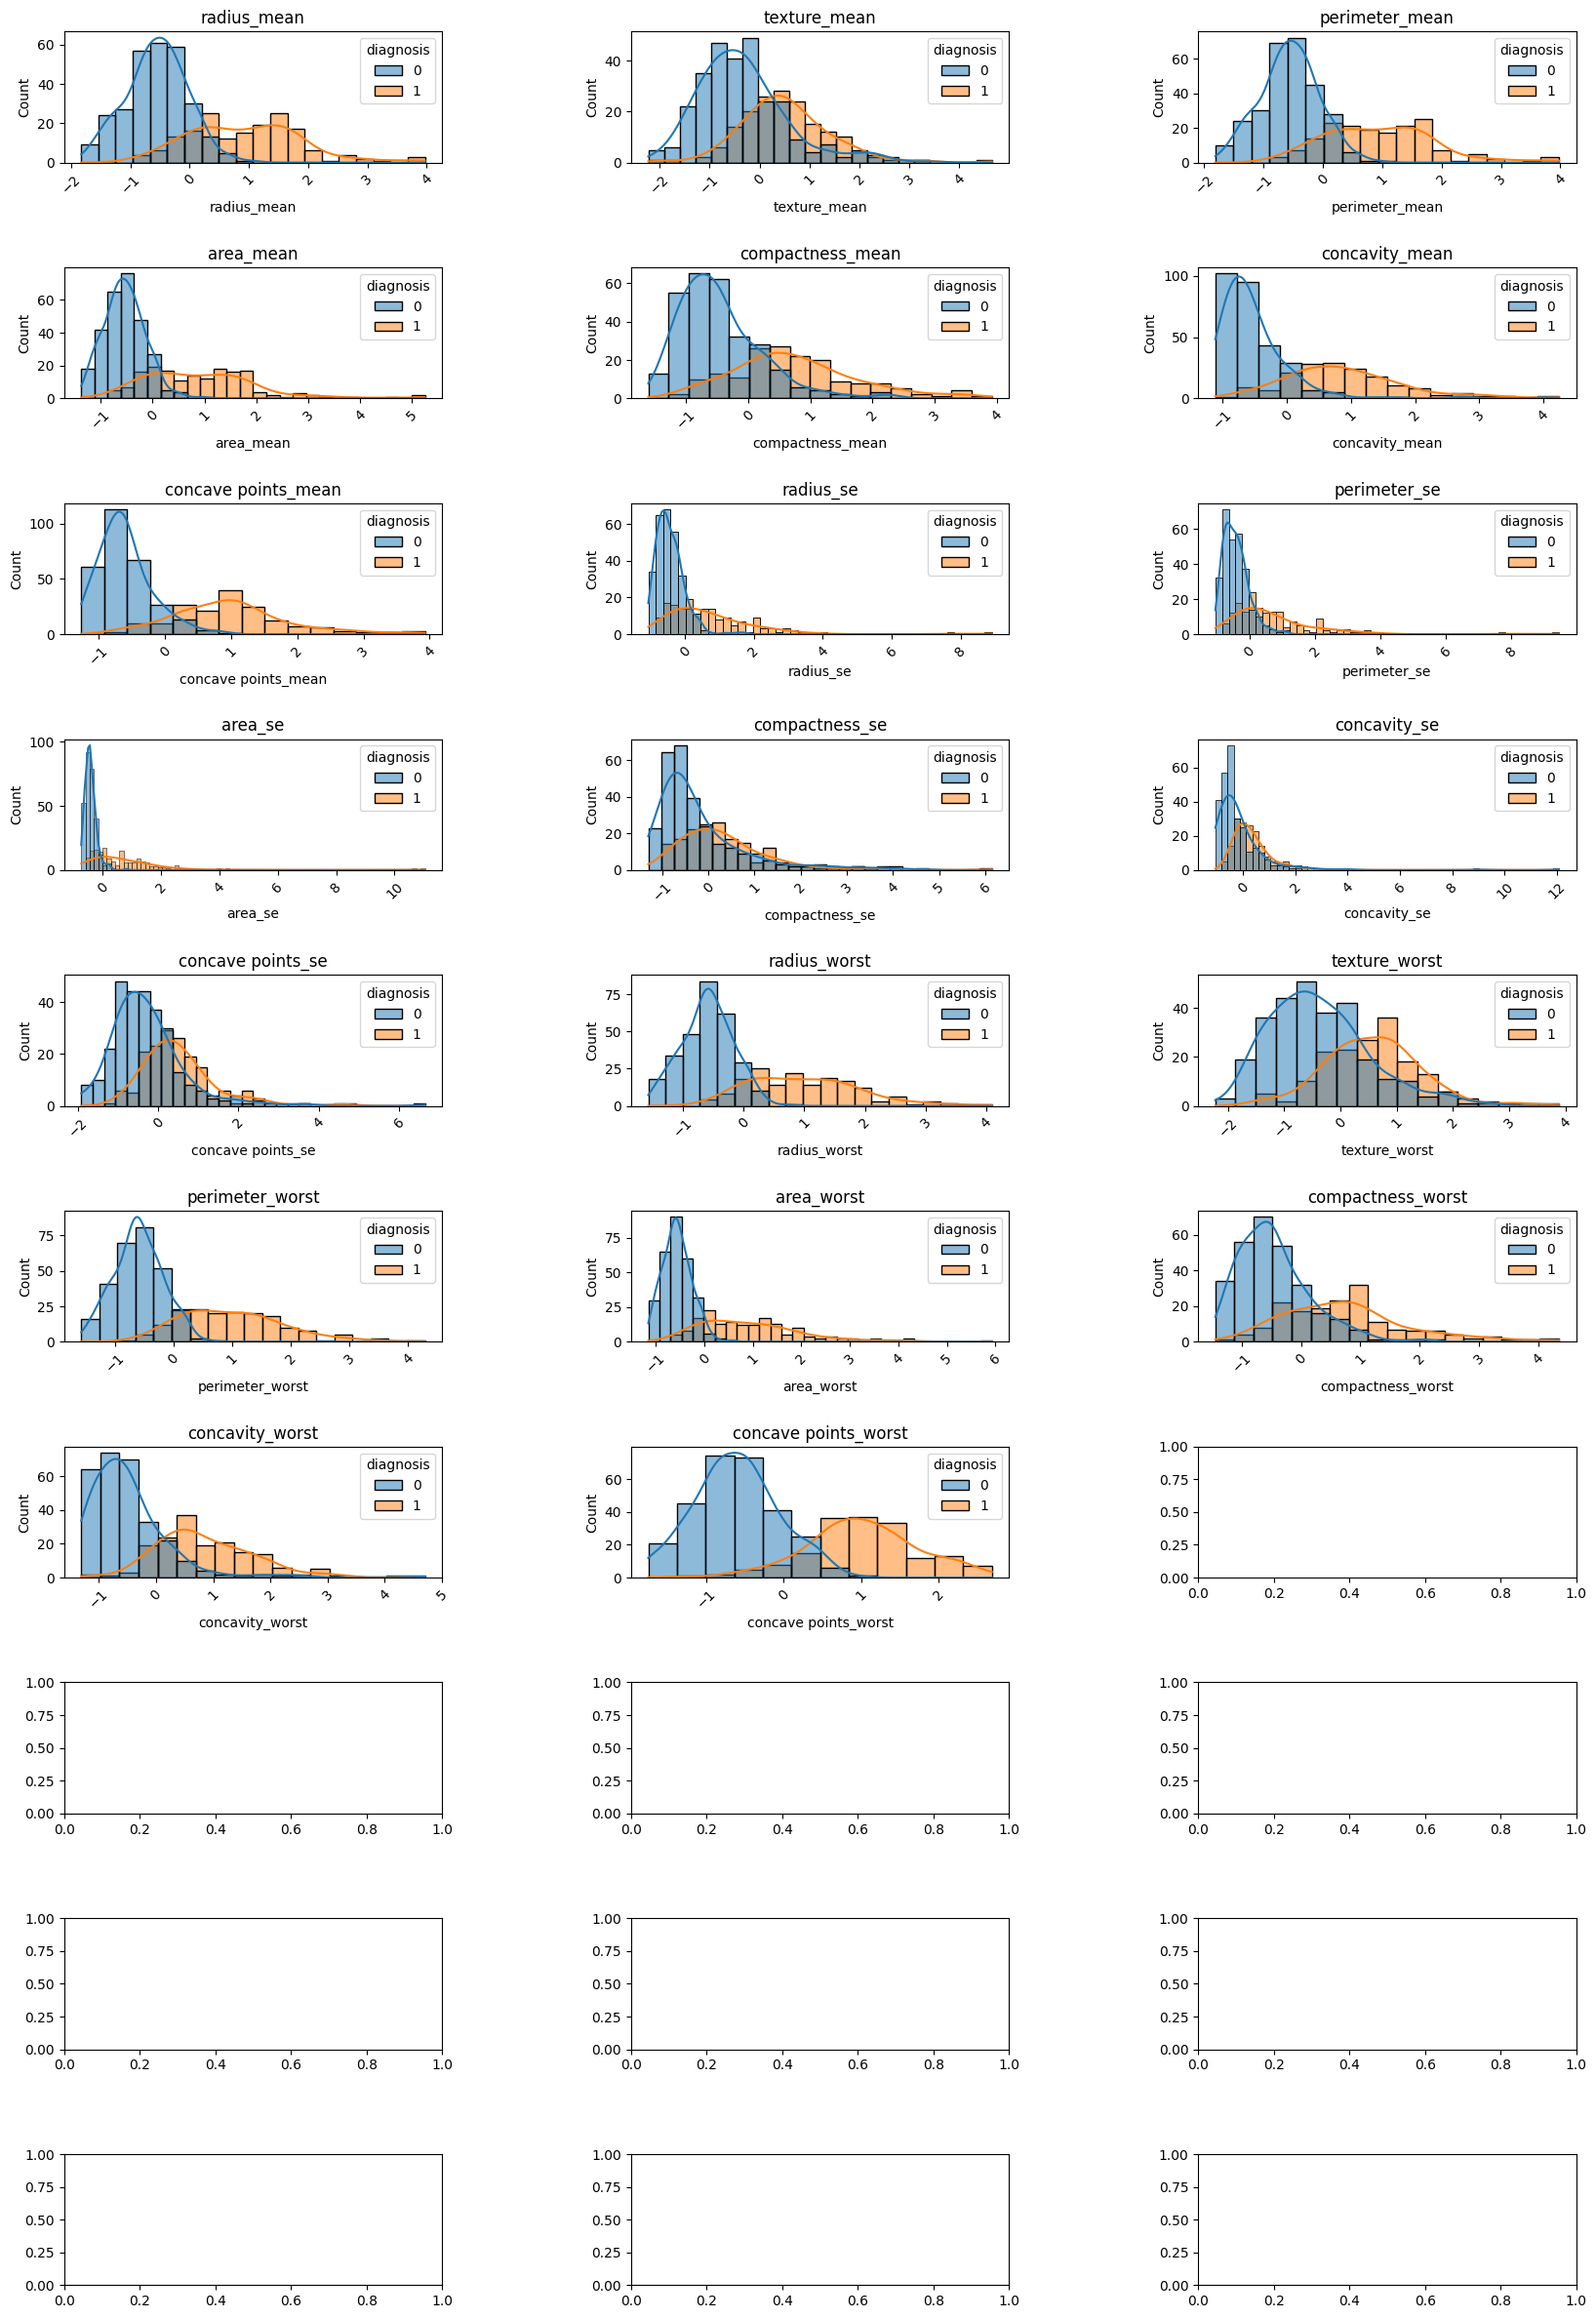

In [25]:
# compare each feature with the diagnosis using histograms
fig, axes = plt.subplots(10, 3, figsize=(20, 30))

for idx, feat in enumerate(data.columns.values[:-1]):
    sns.histplot(data=data, x=feat, hue='diagnosis', ax=axes[idx//3, idx%3], kde=True)
    axes[idx//3, idx%3].set_title(feat, fontsize=12)
    axes[idx//3, idx%3].set_xticklabels(axes[idx//3, idx%3].get_xticklabels(), rotation=45, fontsize=10)

# add padding between subplots
fig.subplots_adjust(hspace=0.8, wspace=0.5)

plt.show()

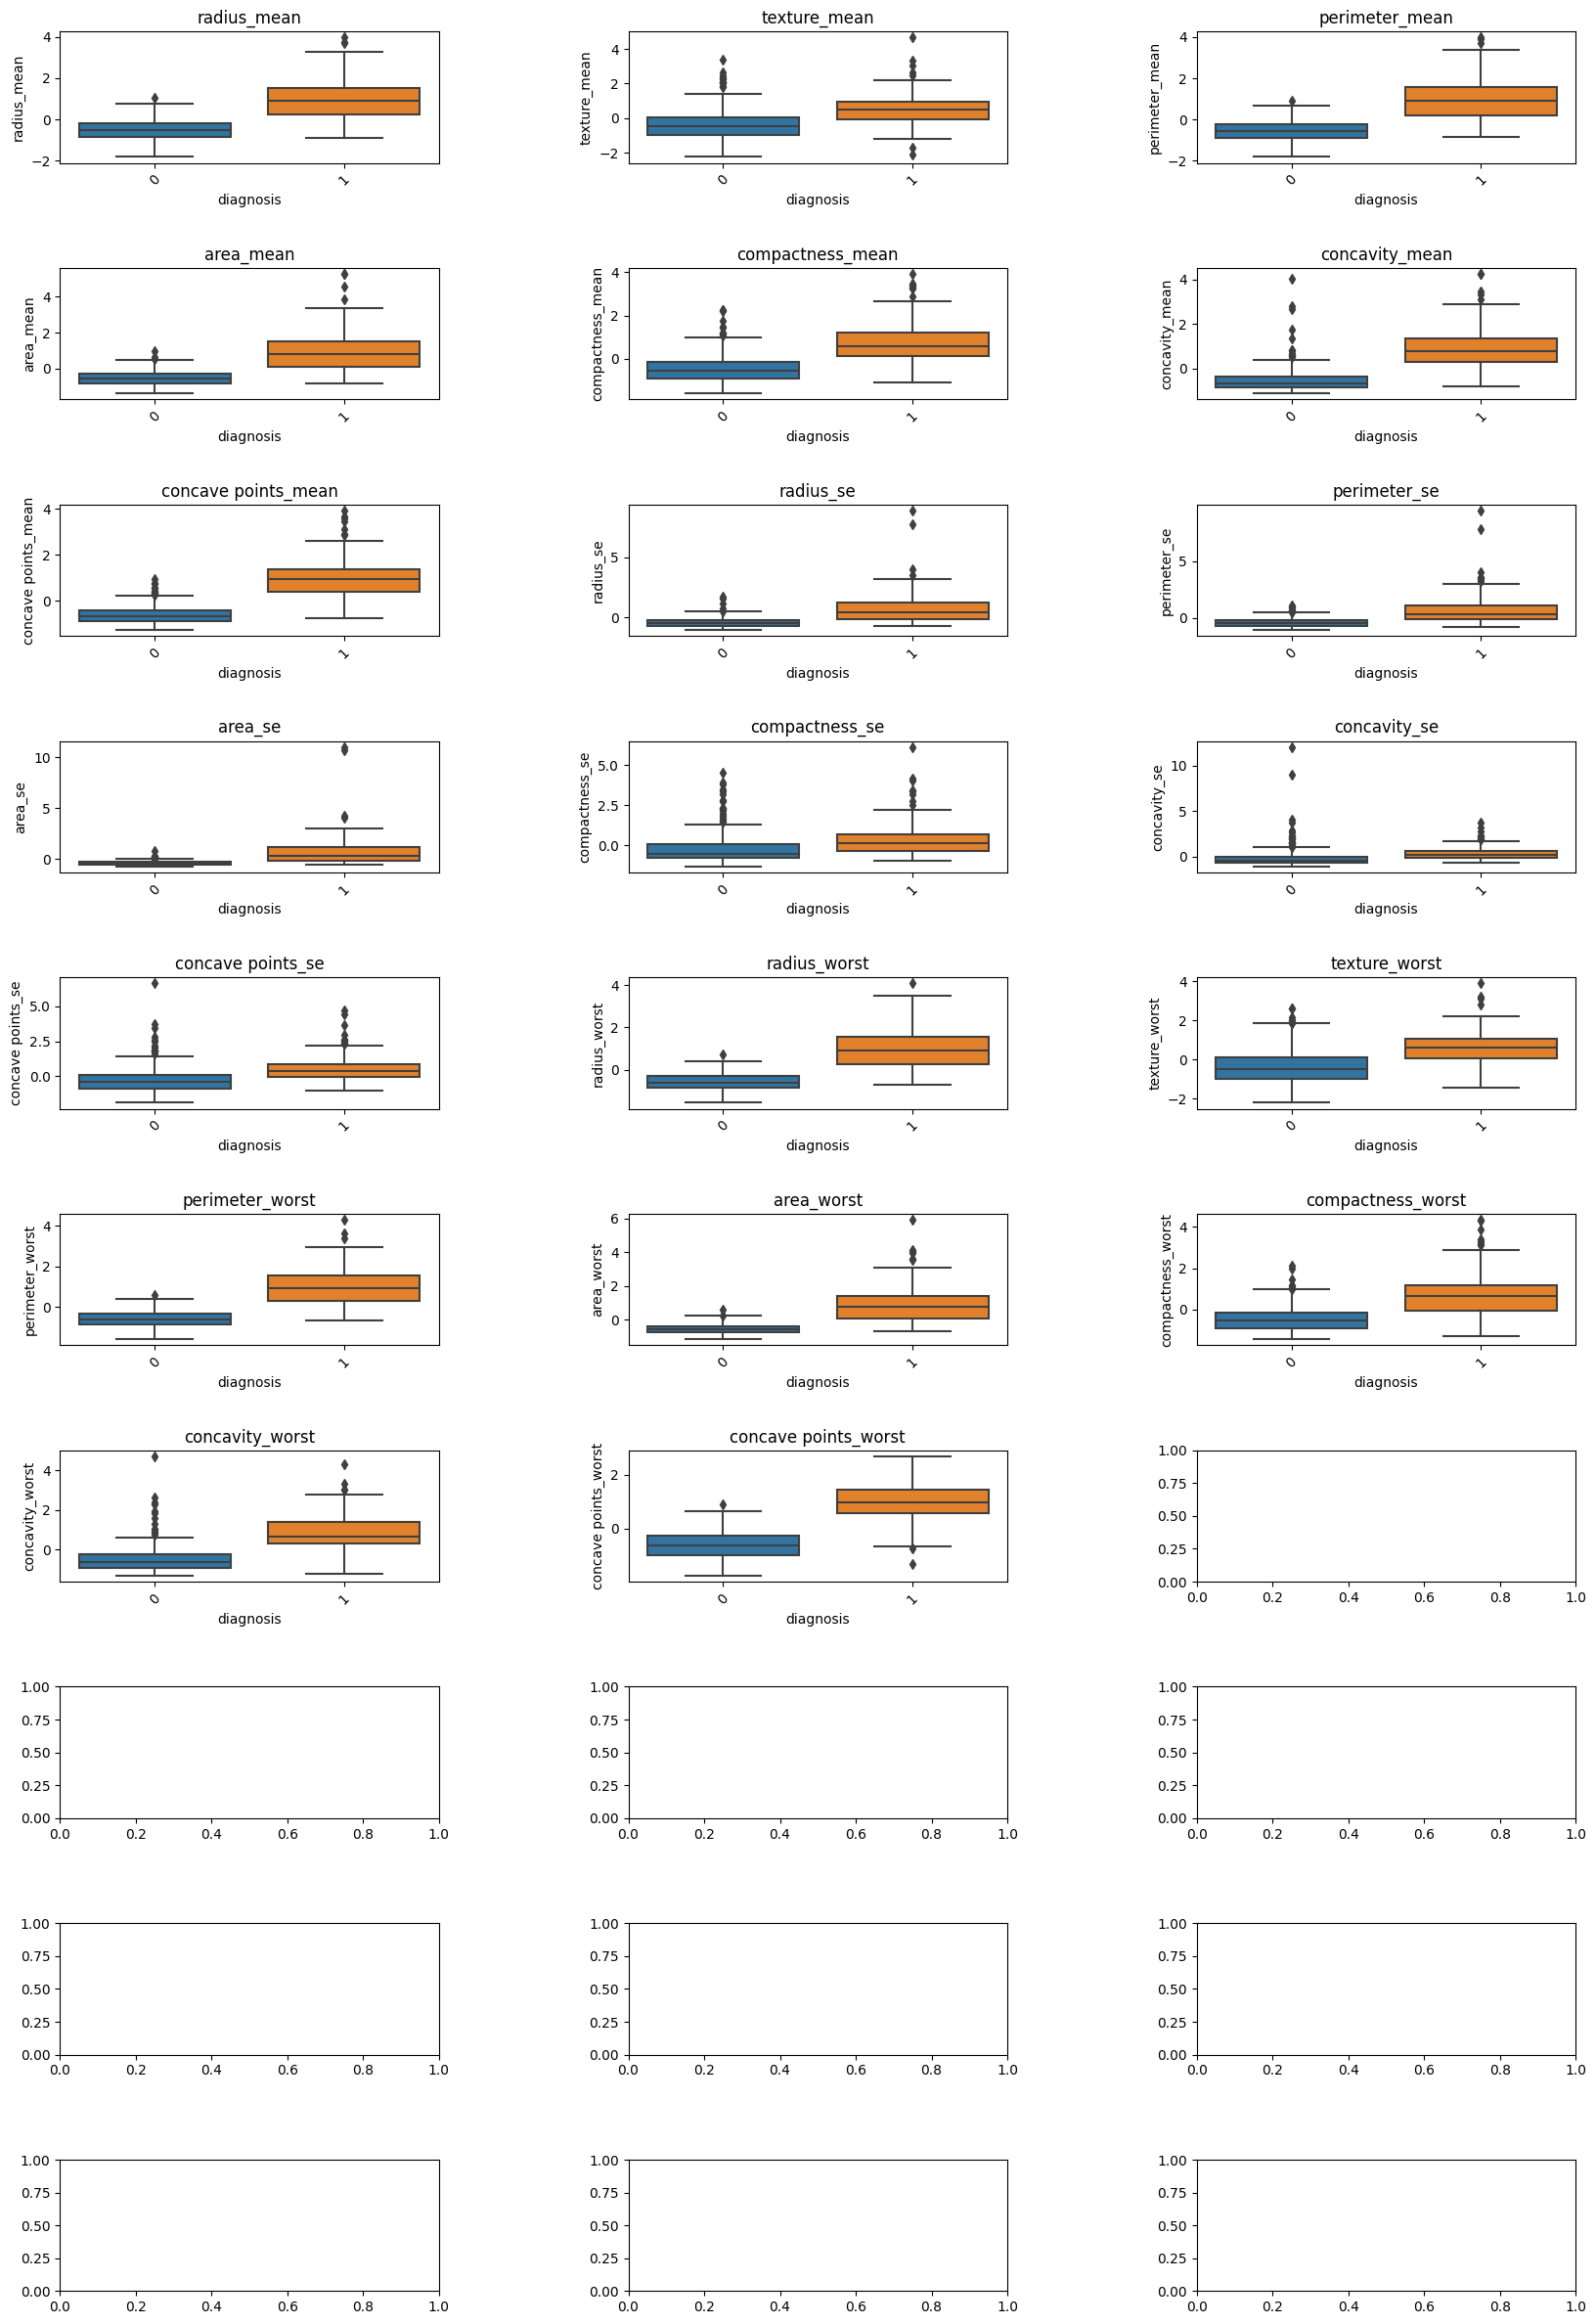

In [26]:
#use boxplots to show the distrubution of each feature

fig, axes = plt.subplots(10, 3, figsize=(20, 30))

for idx, feat in enumerate(data.columns.values[:-1]):
    sns.boxplot(data=data, x='diagnosis', y=feat, ax=axes[idx//3, idx%3])
    axes[idx//3, idx%3].set_title(feat, fontsize=12)
    axes[idx//3, idx%3].set_xticklabels(axes[idx//3, idx%3].get_xticklabels(), rotation=45, fontsize=10)

# add padding between subplots
fig.subplots_adjust(hspace=0.8, wspace=0.5)

plt.show()

In [27]:
print(X.shape)
print(y.shape)

(569, 20)
(569,)


In [28]:
#preserve the column names of x_train
col=X.columns

In [29]:
#standardize the data
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [30]:
#create a dataframe
X=pd.DataFrame(X,columns=col)

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1.097064,-2.073335,1.269934,0.984375,3.283515,2.652874,2.532475,2.489734,2.833031,2.487578,1.316862,0.724026,0.660820,1.886690,-1.359293,2.303601,2.001237,2.616665,2.109526,2.296076
1,1.829821,-0.353632,1.685955,1.908708,-0.487072,-0.023846,0.548144,0.499255,0.263327,0.742402,-0.692926,-0.440780,0.260162,1.805927,-0.369203,1.535126,1.890489,-0.430444,-0.146749,1.087084
2,1.579888,0.456187,1.566503,1.558884,1.052926,1.363478,2.037231,1.228676,0.850928,1.181336,0.814974,0.213076,1.424827,1.511870,-0.023974,1.347475,1.456285,1.082932,0.854974,1.955000
3,-0.768909,0.253732,-0.592687,-0.764464,3.402909,1.915897,1.451707,0.326373,0.286593,-0.288378,2.744280,0.819518,1.115007,-0.281464,0.133984,-0.249939,-0.550021,3.893397,1.989588,2.175786
4,1.750297,-1.151816,1.776573,1.826229,0.539340,1.371011,1.428493,1.270543,1.273189,1.190357,-0.048520,0.828471,1.144205,1.298575,-1.466770,1.338539,1.220724,-0.313395,0.613179,0.729259


In [31]:
#remove the index column
X=X.iloc[:,1:-1]

In [32]:
X.shape

(569, 18)

In [33]:
#correlation matrix

corrmat = X.corr()

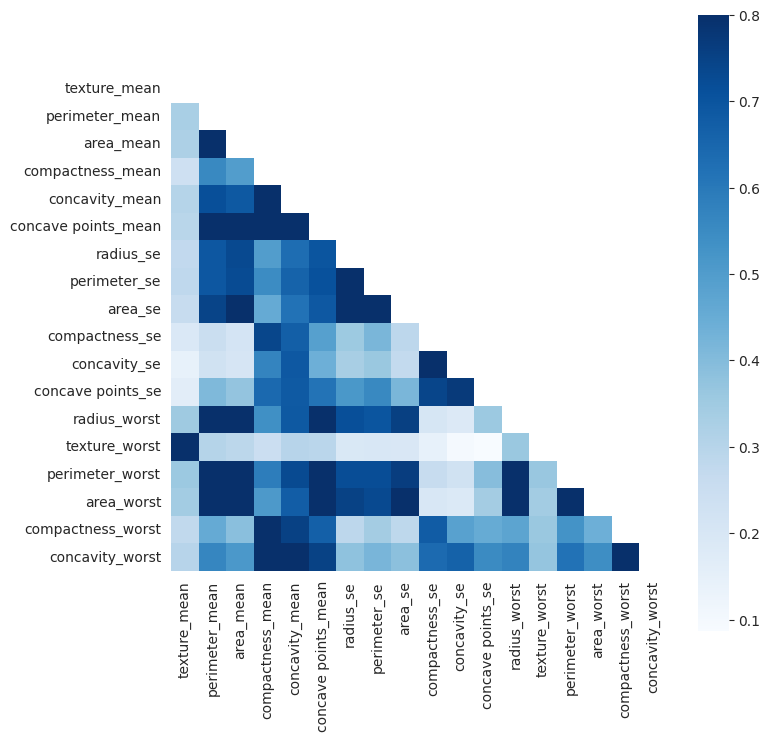

In [34]:
#plot only the lower triangle of the heatmap
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corrmat, mask=mask, vmax= .8, square=True, cmap='Blues')

In [35]:
#create a function to identify the highly correlated features and set threshold to 0.9
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [36]:
#call the function correlation
corr_features = correlation(X, 0.9)

In [37]:
#drop the correlated features
X.drop(labels=corr_features, axis=1, inplace=True)

In [38]:
#check the shape of x_train
X.shape

(569, 10)

In [39]:
#combine X and y
X=pd.concat([X,y],axis=1)
X.head()

,texture_mean,perimeter_mean,compactness_mean,concavity_mean,radius_se,compactness_se,concavity_se,concave points_se,compactness_worst,concavity_worst,diagnosis
0,-2.073335,1.269934,3.283515,2.652874,2.489734,1.316862,0.724026,0.660820,2.616665,2.109526,1
1,-0.353632,1.685955,-0.487072,-0.023846,0.499255,-0.692926,-0.440780,0.260162,-0.430444,-0.146749,1
2,0.456187,1.566503,1.052926,1.363478,1.228676,0.814974,0.213076,1.424827,1.082932,0.854974,1
3,0.253732,-0.592687,3.402909,1.915897,0.326373,2.744280,0.819518,1.115007,3.893397,1.989588,1
4,-1.151816,1.776573,0.539340,1.371011,1.270543,-0.048520,0.828471,1.144205,-0.313395,0.613179,1


In [40]:
from sklearn.decomposition import PCA

In [41]:
def PCA_Dim(data, target, n_componets=None, top_features=1):
   
   #separate the features and class labels
   X=data.drop(columns=[target])
   y=data[target]
   
   
   #initialize pca with n_components
   pca = PCA(n_components=n_componets)

   #fit the data
   pca.fit(data)

   #get the principal components
   principalComponents = pca.components_

   #create a dataframe to store the principal components
   principalDf = pd.DataFrame(data=principalComponents, columns=data.columns, index=['PC' + str(i) for i in range(1, principalComponents.shape[0]+1)]).transpose()

   #initialize a dictionary to store top features of each principal component
   top_features_dict = {}

   #loop through each principal component
   for components in principalDf.columns:
      #sort components by absolute value in descending order
      sorted_features = abs(principalDf[components]).sort_values(ascending=False)

      #select top_n features
      top_features_dict[components] = sorted_features[0:top_features].index.values.tolist()

   #create a list of all the top features of all the principal components
   top_features_list = [feature for sublist in top_features_dict.values() for feature in sublist]

   #calculate the PCA variance explained and cummilative variance explained
   explained_variance = pca.explained_variance_
   cum_variance_explained = np.cumsum(pca.explained_variance_ratio_)

   #plot variance explained
   plt.figure(figsize=(10,5))
   plt.bar(range(1,len(explained_variance)+1),explained_variance)
   plt.xlabel('Number of Components')
   plt.ylabel('Explained Variance')
   plt.title('Explained Variance of PCA')
   plt.xticks(range(1,len(explained_variance)+1))
   plt.grid(True)
   plt.show()

   #plot cummilative variance explained
   plt.figure(figsize=(10,5))
   plt.bar(range(1,len(cum_variance_explained)+1),cum_variance_explained)
   plt.xlabel('Number of Components')
   plt.ylabel('Cummulative Explained Variance')
   plt.title('Cummulative Explained Variance of PCA')
   plt.xticks(range(1,len(cum_variance_explained)+1))
   plt.grid(True)
   plt.show()

   #print selected and discarded features
   print('Selected Features: ', top_features_list)
   print('Discarded Features: ', [feature for feature in data.columns if feature not in top_features_list])

   #create a new dataframe with the selected features and class labels column
   new_data = data[top_features_list + [target]]
   return new_data


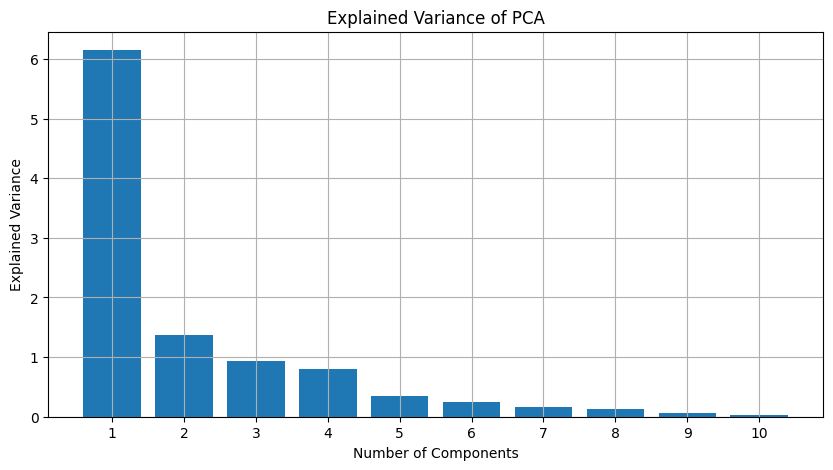

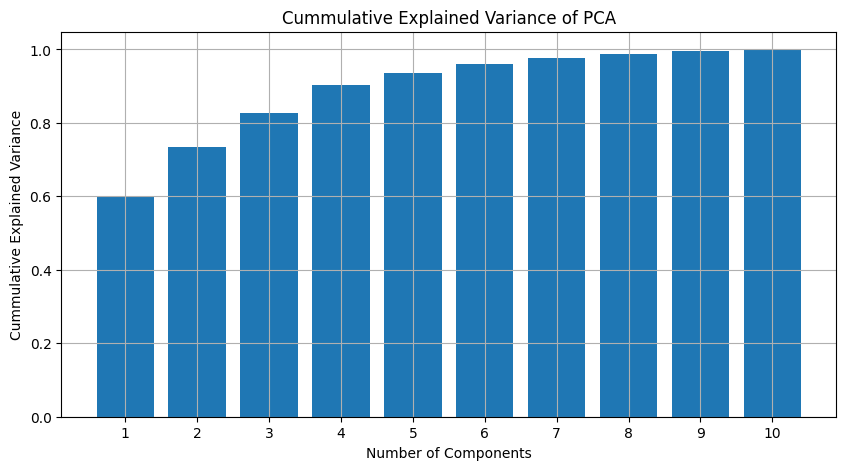

Selected Features:  ['concavity_mean', 'perimeter_mean', 'radius_se', 'texture_mean', 'concavity_se', 'concave points_se', 'compactness_se', 'compactness_mean', 'diagnosis', 'concavity_se']
Discarded Features:  ['compactness_worst', 'concavity_worst']


In [42]:

#feature selection using PCA
X=PCA_Dim(X,'diagnosis',n_componets=10,top_features=1)

In [43]:
#check the shape of X
X.shape

(569, 11)

In [44]:
#drop the class labels column
y=X['diagnosis']

In [45]:
y.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
#drop the class labels column
X=X.drop(['diagnosis'],axis=1)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#train isolation forest with the x_train
model=IsolationForest( max_samples=256, contamination=0.05,random_state=42, n_jobs=-1)
model.fit(X_train)

IsolationForest(contamination=0.05, max_samples=256, n_jobs=-1, random_state=42)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
np.unique(y_pred)

array([-1,  1])

In [ ]:
#map class -1 to 1 and 1 to 0
y_pred=np.where(y_pred==-1,1,0)

np.unique(y_pred)

array([0, 1])

In [ ]:
# Calculate the accuracy score
accuracy_score = roc_auc_score(y_test, y_pred)

In [ ]:
# Print the accuracy score
print("Accuracy score: {}".format(accuracy_score))

Accuracy score: 0.5091713069112349


In [ ]:
#find the f1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)


0.0851063829787234

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)


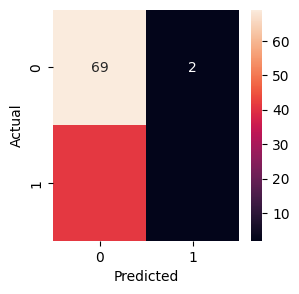

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
# Compute the precision and recall for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

# Create a table to display the precision and recall for each class
table = pd.DataFrame({'Precision': precision, 'Recall': recall}, index=['Benign', 'Malignant'])
print(table)

           Precision    Recall
Benign      0.627273  0.971831
Malignant   0.500000  0.046512


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter= Counter(y_train)
print('Before',counter)
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

counter= Counter(y_resampled)
print('After',counter)


Before Counter({0: 286, 1: 169})
After Counter({0: 286, 1: 286})


In [ ]:
# #oversample using SMOTE and ENN
# from imblearn.combine import SMOTEENN

# counter= Counter(y_train)
# print('Before',counter)
# # Create an instance of the SMOTEENN class
# smote_enn = SMOTEENN(random_state=42)
# X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# counter= Counter(y_resampled)
# print('After',counter)

In [ ]:
#train isolation forest with the x_train
model=IsolationForest( max_samples=128, contamination=0.1,random_state=42, n_jobs=-1,n_estimators=100)
model.fit(X_resampled)

IsolationForest(contamination=0.1, max_samples=128, n_jobs=-1, random_state=42)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
#map class -1 to 1 and 1 to 0
y_pred=np.where(y_pred==-1,1,0)

np.unique(y_pred)

array([0, 1])

In [ ]:
# Calculate the accuracy score
accuracy_score = roc_auc_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score: {}".format(accuracy_score))

Accuracy score: 0.4993449066491975


In [ ]:
#find the f1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)


0.20338983050847456

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Compute the precision and recall for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

# Create a table to display the precision and recall for each class
table = pd.DataFrame({'Precision': precision, 'Recall': recall}, index=['Benign', 'Malignant'])
print(table)

           Precision    Recall
Benign      0.622449  0.859155
Malignant   0.375000  0.139535


In [ ]:
#give a precision, recall, F1 score and accuracy of the model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.62      0.86      0.72        71
           1       0.38      0.14      0.20        43

    accuracy                           0.59       114
   macro avg       0.50      0.50      0.46       114
weighted avg       0.53      0.59      0.53       114



In [ ]:
#use undersampling to balance the data

from imblearn.under_sampling import RandomUnderSampler

# define the undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)


In [ ]:
#train isolation forest with the x_train_resampled
model=IsolationForest( max_samples=64, contamination=0.05,random_state=42, n_jobs=-1)
model.fit(X_train_resampled)

IsolationForest(contamination=0.05, max_samples=64, n_jobs=-1, random_state=42)

In [ ]:
#predict the x_test
y_pred=model.predict(X_test)

In [ ]:
#map class -1 to 1 and 1 to 0
y_pred=np.where(y_pred==-1,1,0)

np.unique(y_pred)

array([0, 1])

In [ ]:
#give a precision, recall, F1 score and accuracy of the model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        71
           1       1.00      0.07      0.13        43

    accuracy                           0.65       114
   macro avg       0.82      0.53      0.46       114
weighted avg       0.78      0.65      0.54       114



In [ ]:
from sklearn.ensemble import IsolationForest

# train the isolation forest model
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, random_state=42)
clf.fit(X_train_resampled)

# obtain the anomaly score for each sample
y_score = clf.decision_function(X_test)

# set a custom threshold
threshold = -0.2

# make predictions based on the custom threshold
y_pred = [1 if score < threshold else 0 for score in y_score]

# evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114

